# Auswahl des Forschungskorpus

Diese Fallstudie untersucht, wie deutschsprachige literarische Texte des 19. Jahrhunderts die abnehmende Luftqualität reflektieren und diskursivieren.  
Ein zentraler Schritt besteht darin, ein geeignetes **Forschungskorpus** auszuwählen, das den historischen Zeitraum und die thematische Breite unserer Forschungsfrage abdeckt.

Im Unterschied zur vorherigen Fallstudie, in der das Korpus selbst aufgebaut wurde, liegt der Fokus hier auf der **reflektierten Auswahl** eines bestehenden Korpus.

````{admonition} Lernziel
:class: keypoint
Nach diesem Abschnitt können Sie die Kriterien für die Auswahl eines geeigneten Forschungskorpus benennen, bestehende Korpora vergleichen und den Auswahlprozess datenbasiert begründen.
`````

---

## 1 Vom Aufbau zur Auswahl

Während in der Fallstudie 1 ein eigenes Zeitungskorpus zur Spanischen Grippe 1918/19 aufgebaut wurde, greifen wir in dieser Fallstudie auf bereits existierende digitale Korpora deutschsprachiger Prosa zurück. Wir stehen also nicht vor der Aufgabe, Texte selbst zu digitalisieren, sondern müssen reflektiert entscheiden, **welches existierende Korpus** für unsere Forschungsfrage geeignet ist.

Die im Kapitel [„Korpora als Forschungsobjekte“](corpus-collection_corpora-as-research-objects.md) beschriebenen Strategien – *Vollständigkeit, Repräsentativität, Balance* und *Opportunismus* – bilden dabei unseren Bewertungsrahmen {cite:p}`schoech2017`.

---

## 2 Vorhandene Korpora deutschsprachiger Prosa

Im Folgenden werden drei frei verfügbare Korpora vorgestellt, die sich für literaturwissenschaftliche Analysen deutscher Prosa eignen. Konkret wurden für diese Fallstudie das [d-Prose-Korpus](https://zenodo.org/records/5015008), das [Corpus of German-Language Fiction](https://figshare.com/articles/dataset/Corpus_of_German-Language_Fiction_txt_/4524680) sowie das [German ELTeC-Korpus](https://zenodo.org/records/4662482) herangezogen.

| Korpus                                                                                                                                   | Beschreibung                                 | Zeitraum  | Format    | Auswahlstrategie             | Stärken                                            | Schwächen                            |
| ---------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------- | --------- | --------- | ---------------------------- | -------------------------------------------------- | ------------------------------------ |
| **d-Prose 1870–1920** ([Zenodo](https://zenodo.org/records/5015008))                                                                     | ca. 150 Werke, TEI/XML, kuratiert            | 1870–1920 | TEI/XML   | balanciert                   | gute Metadaten, literaturwissenschaftlich gepflegt | begrenzter Zeitraum                  |
| **Corpus of German-Language Fiction** ([Figshare](https://figshare.com/articles/dataset/Corpus_of_German-Language_Fiction_txt_/4524680)) | ca. 1 200 Romane in Plain Text mit Metadaten | 1750–1950 | TXT | opportunistisch / balanciert | großer Umfang, gute zeitliche Abdeckung            | uneinheitliche Metadaten, OCR-Fehler |
| **ELTeC-German** ([Zenodo](https://zenodo.org/records/4662482))                                                                          | ca. 100 Werke, nach ELTeC-Samplingprotokoll  | 1840–1920 | TEI/XML   | repräsentativ                | methodisch solide, Gender-Balance                  | relativ klein, Lücken vor 1840       |

```{admonition} Hinweis
:class: tip
Bereits in dieser Übersicht zeigt sich, dass kein Korpus „perfekt“ ist. 
Die Entscheidung für ein Korpus hängt immer vom Zusammenspiel zwischen Forschungsfrage, zeitlicher Abdeckung, Datenqualität und praktischer Zugänglichkeit ab.
```

---

## 3 Explorative Analyse der Metadaten

Um die Eignung der Korpora genauer zu prüfen, untersuchen wir zunächst ihre Metadaten.
Ziel ist es, **ein erstes Gefühl für die zeitliche Verteilung, Vollständigkeit und Struktur** der Daten zu gewinnen.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Option 1. ELTeC-DEU corpus

### Einlesen der Korpusmetadaten in Python

In [2]:
meta = pd.read_csv("https://zenodo.org/records/4662482/files/metadata.csv")
meta.head()

,id,author-name,book-title,subgenre,year,year-cat,canon-cat,gender-cat,length,length-cat,counter,Author-birth,Author-death,GND
0,DEU001,"Willkomm, Ernst Adolf",Weisse Sclaven oder die Leiden des Volkes,foo,1845,T1,low,m,322371,long,1,1810,1886,http://d-nb.info/gnd/11739467X
1,DEU002,"Auerbach, Berthold",Der Lehnhold,foo,1854,T1,low,m,66067,medium,1,1812,1882,http://d-nb.info/gnd/11865103X
2,DEU003,"Ruppius, Otto",Der Pedlar,foo,1857,T1,low,m,89800,medium,1,1819,1864,http://d-nb.info/gnd/116708859
3,DEU004,"Otto, Louise",Nürnberg. Zweiter Band,foo,1858,T1,low,f,56702,medium,1,1819,1895,http://d-nb.info/gnd/118590901
4,DEU005,"Kurz, Hermann",Der Sonnenwirt,foo,1854,T1,high,m,216063,long,1,1813,1873,http://d-nb.info/gnd/118778277


### Analyse der zeitlichen Verteilung des Korpus

Pro Jahr

In [3]:
# Anzahl der Texte pro Jahr

def summarize_texts_per_year(df, year_column):
    """Return per-yearcounts and summary stats for the given year column."""
    bins = df[year_column].dropna()
    if bins.empty:
        raise ValueError(f"No year values found in column '{year_column}'.")
    bins = bins.astype(int)
    counts = bins.value_counts().sort_index()
    full_index = pd.RangeIndex(counts.index.min(), counts.index.max() + 1)
    counts = counts.reindex(full_index, fill_value=0)
    stats = counts.agg(['mean', 'max', 'min']).rename({'mean': 'avg_per_year'})
    return counts, stats

year_counts, year_stats = summarize_texts_per_year(meta, 'year')

print("Textanzahl der Texte im ELTEC-DEU pro Jahr:")
print(year_stats)



Textanzahl der Texte im ELTEC-DEU pro Jahr:
avg_per_year    1.234568
max             5.000000
min             0.000000
Name: count, dtype: float64


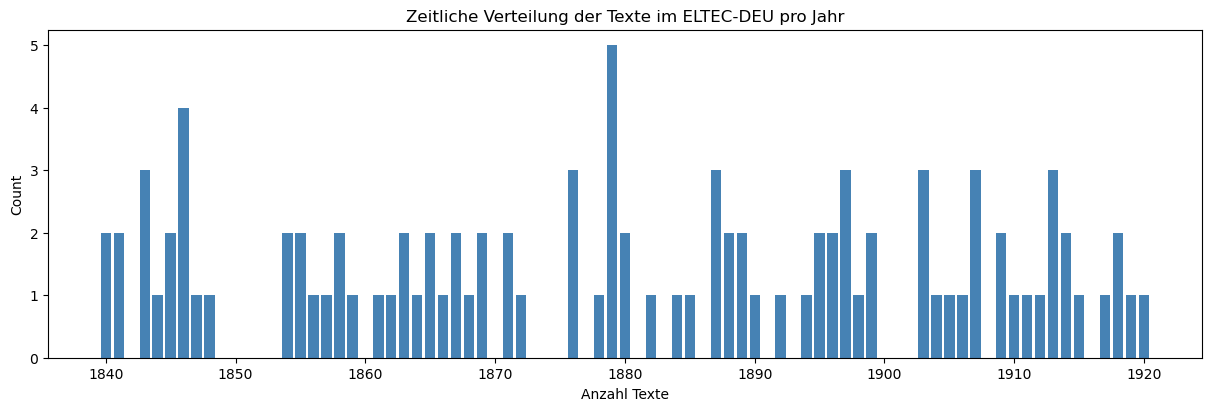

In [4]:
# Visualisierung der Jahresverteilung (Textanzahl pro Jahr)
fig_year, ax_year = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_year.bar(year_counts.index, year_counts.values, color="steelblue")
ax_year.set_title("Zeitliche Verteilung der Texte im ELTEC-DEU pro Jahr")
ax_year.set_xlabel("Anzahl Texte")
ax_year.set_ylabel("Count")
plt.show()

Pro Jahrzehnt

In [5]:
# Anzahl der Texte pro Jahrzehnt
def summarize_texts_per_decade(df, decade_column):
    """Return per-yearcounts and summary stats for the given year column."""
    bins = df[decade_column].dropna()
    if bins.empty:
        raise ValueError(f"No year values found in column '{decade_column}'.")
    bins = bins.astype(int)
    counts = bins.value_counts().sort_index()
    stats = counts.agg(['mean', 'max', 'min']).rename({'mean': 'avg_per_year'})
    return counts, stats

meta['decade'] = (meta['year'] // 10) * 10
decade_counts, decade_stats = summarize_texts_per_decade(meta, 'decade')

print("Textanzahl der Texte im ELTEC-DEU pro Jahrzehnt:")
print(decade_stats)

Textanzahl der Texte im ELTEC-DEU pro Jahrzehnt:
avg_per_year    11.111111
max             16.000000
min              1.000000
Name: count, dtype: float64


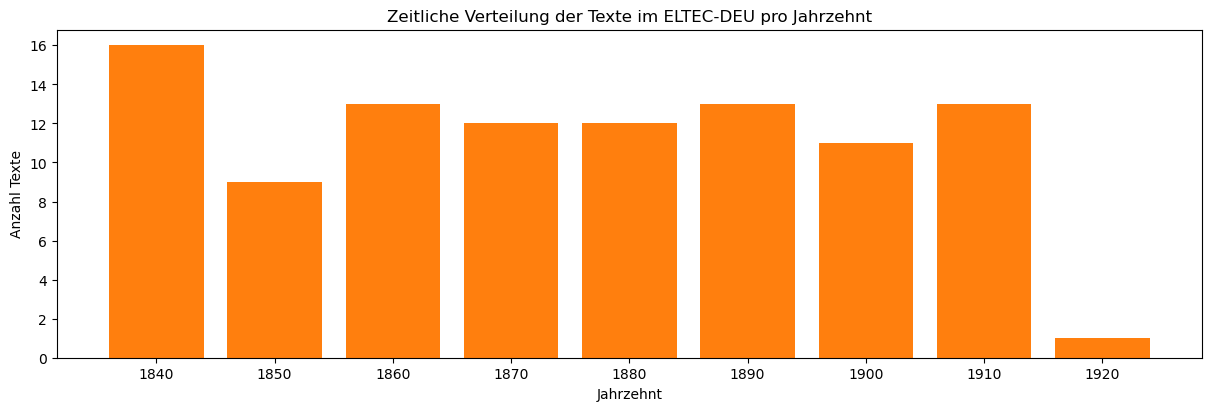

In [6]:
# Visualisierung der Dekadenverteilung (Textanzahl pro Dekade)
fig_decade, ax_decade = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_decade.bar(decade_counts.index.astype(str), decade_counts.values, color="tab:orange")
ax_decade.set_title("Zeitliche Verteilung der Texte im ELTEC-DEU pro Jahrzehnt")
ax_decade.set_xlabel("Jahrzehnt")
ax_decade.set_ylabel("Anzahl Texte")
plt.show()


# Option 2. d-Prose corpus

### Einlesen der Korpusmetadaten in Python

In [7]:
## code to analyse the metadata of the d-Prose corpus

meta_d_prose = pd.read_csv("https://zenodo.org/records/5015008/files/d-prose_V2_norm_year.csv", 
                           sep=';')
meta_d_prose.head()

,ID,Repositorium,Vorname Autor,Nachname Autor,Nationalität,Pseudonym/Anderer Name,Gesamtname Autor,Geburtsjahr,Sterbejahr,Autor:innengender,Titel,Dateiname,verwendetes Datum,Wörter,Typen,norm_year
0,1,gutenberg,Arthur,Achleitner,Deutschland,NaN,Arthur Achleitner,1858.0,1927,male,Das Schloß im Moor,Achleitner_Arthur_Das_Schloss_im_Moor,1903,50886,9654,1903
1,2,gutenberg,Arthur,Achleitner,Deutschland,NaN,Arthur Achleitner,1858.0,1927,male,Der Finanzer,Achleitner_Arthur_Der_Finanzer,1903,23933,5941,1903
2,3,gutenberg,Karl,Adolph,Österreich,NaN,Karl Adolph,1869.0,1931,male,Haus Nummer 37,Adolph_Karl_Haus_Nummer,1908,102735,17038,1908
3,4,gutenberg,Karl,Adolph,Österreich,NaN,Karl Adolph,1869.0,1931,male,Schackerl,Adolph_Karl_Schackerl,1912,39838,9266,1912
4,5,gutenberg,Karl,Adolph,Österreich,NaN,Karl Adolph,1869.0,1931,male,Töchter,Adolph_Karl_Toechter,1914,87720,15569,1914


### Analyse der zeitlichen Verteilung des Korpus

Pro Jahr (d-Prose)

In [8]:
year_counts, year_stats = summarize_texts_per_year(meta_d_prose, 'norm_year')

print("Textanzahl der Texte im d-Prose pro Jahr:")
print(year_stats)

Textanzahl der Texte im d-Prose pro Jahr:
avg_per_year     49.235294
max             136.000000
min               6.000000
Name: count, dtype: float64


Man sieht, dass d-Prose ein wesentlich "dichteres" Korpus ist …

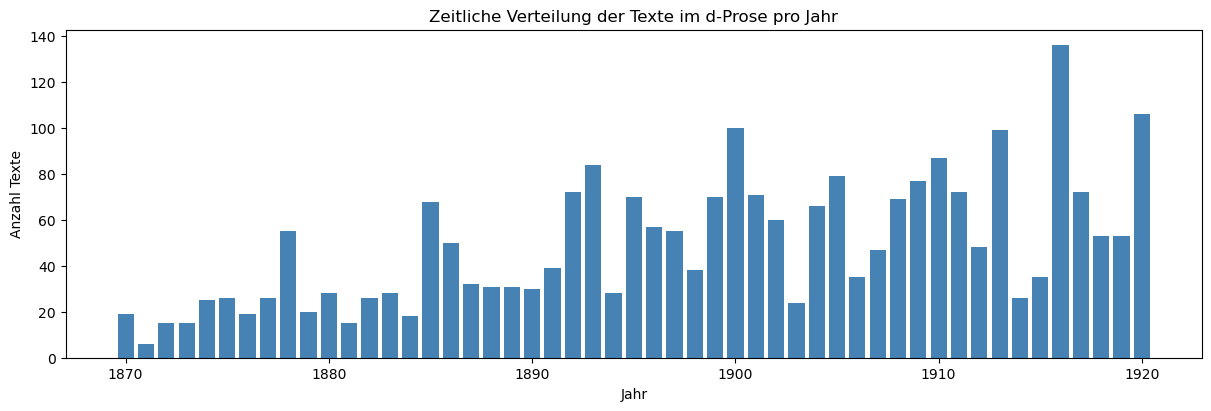

In [9]:
# Visualisierung der Jahresverteilung (Textanzahl pro Jahr)
fig_year, ax_year = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_year.bar(year_counts.index, year_counts.values, color="steelblue")
ax_year.set_title("Zeitliche Verteilung der Texte im d-Prose pro Jahr")
ax_year.set_xlabel("Jahr")
ax_year.set_ylabel("Anzahl Texte")
plt.show()

In [11]:
# Anzahl der Texte pro Jahrzehnt

meta_d_prose['decade'] = (meta_d_prose['norm_year'] // 10) * 10

decade_counts, decade_stats = summarize_texts_per_decade(meta_d_prose, 'decade')

print("Textanzahl der Texte im d-Prose pro Jahrzehnt:")
print(decade_stats)

Textanzahl der Texte im d-Prose pro Jahrzehnt:
avg_per_year    418.5
max             681.0
min             106.0
Name: count, dtype: float64


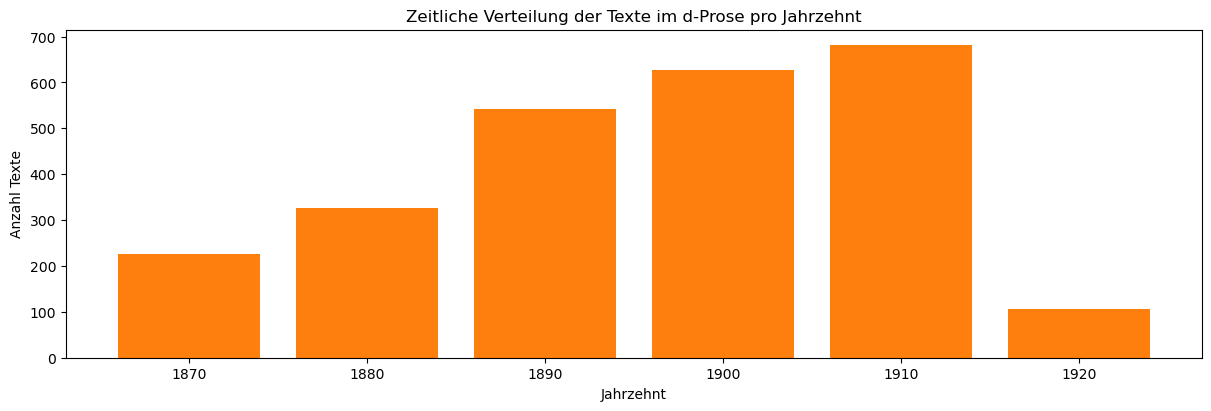

In [12]:
# Visualisierung der Dekadenverteilung (Textanzahl pro Dekade)
fig_decade, ax_decade = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_decade.bar(decade_counts.index.astype(str), decade_counts.values, color="tab:orange")
ax_decade.set_title("Zeitliche Verteilung der Texte im d-Prose pro Jahrzehnt")
ax_decade.set_xlabel("Jahrzehnt")
ax_decade.set_ylabel("Anzahl Texte")
plt.show()


Man sieht jedoch auch, dass dieses Korpus sehr klein ist und den für uns relevanten Zeitraum nicht abdeckt.

# Option 3. Corpus of German-Language Fiction

Für das ''Corpus of German-Language Fiction'' liegt keine fertige Metadatentabelle vor. Sämtliche Metadaten sind hier in den Dateinamen in relativ standardisierter Form kodiert:

`Author_name_-_Text_title_(year).txt` 

e.g. 

`Abraham_Manuel_Fröhlich_-_Die_Verschüttung_im_Hauenstein_(1858).txt`

Daher werden die Korpusdateien in einem [separaten Notebook](corpus-collection_metadata-extraction.ipynb) per RegEx in Metadaten überführt.
An dieser Stelle arbeiten wir mit den Metadaten, die aus diesem Parsing hervorgehen.

In [13]:
meta_gfc = pd.read_csv('../metadata/metadata_corpus-german_language_fiction.csv')
meta_gfc.head()

,lastname,firstname,title,year,volume,ID
0,Walloth,Wilhelm,Das Schatzhaus des Königs,1883,NaN,Wilhelm_Walloth_-_Das_Schatzhaus_des_Königs_(1...
1,Däubler,Theodor,L'Africana,1928,NaN,Theodor_Däubler_-_L'Africana_(1928)
2,Eyth,Max,Der Schneider von Ulm,1906,NaN,Max_Eyth_-_Der_Schneider_von_Ulm_(1906)
3,Novalis,NaN,Die Lehrlinge zu Sais,1799,NaN,Novalis_-_Die_Lehrlinge_zu_Sais_(1799)
4,Wieland,Christoph Martin,Agathodämon,1799,NaN,Christoph_Martin_Wieland_-_Agathodämon_(1799)


### Analyse der zeitlichen Verteilung des Korpus

Pro Jahr (Corpus of German-Language Fiction)

In [14]:
year_counts, year_stats = summarize_texts_per_year(meta_gfc, 'year')

print("Textanzahl der Texte im 'Corpus of German Fiction' pro Jahr:")
print(year_stats)

Textanzahl der Texte im 'Corpus of German Fiction' pro Jahr:
avg_per_year     2.860879
max             66.000000
min              0.000000
Name: count, dtype: float64


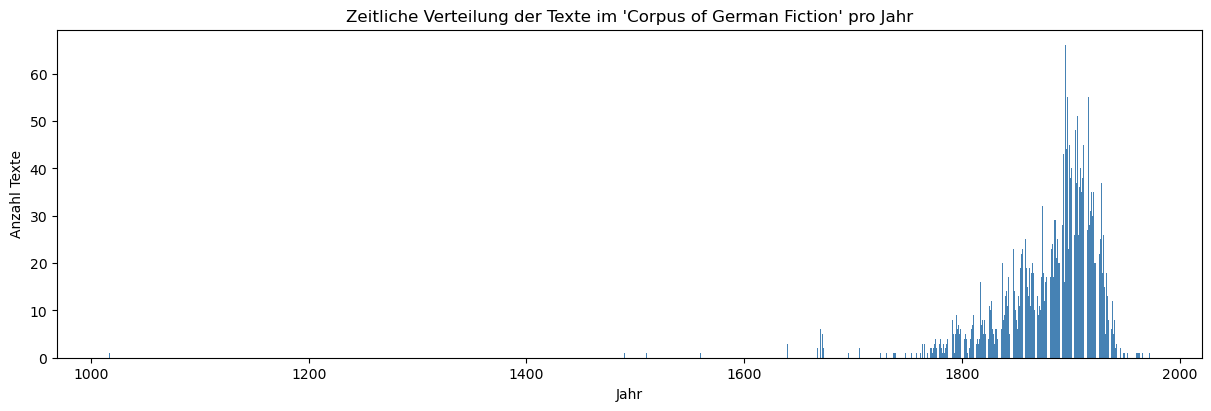

In [ ]:
# Visualisierung der Jahresverteilung (Textanzahl pro Jahr)
fig_year, ax_year = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_year.bar(year_counts.index, year_counts.values, color="steelblue")
ax_year.set_title("Zeitliche Verteilung der Texte im 'Corpus of German-Language Fiction' pro Jahr")
ax_year.set_xlabel("Jahr")
ax_year.set_ylabel("Anzahl Texte")
plt.show()

In [ ]:
# Anzahl der Texte pro Jahrzehnt

meta_gfc['decade'] = (meta_gfc['year'] // 10) * 10

decade_counts, decade_stats = summarize_texts_per_decade(meta_gfc, 'decade')

print("Textanzahl der Texte im 'Corpus of German-Language Fiction' pro Jahrzehnt:")
print(decade_stats)

Textanzahl der Texte im 'Corpus of German Fiction' pro Jahrzehnt:
avg_per_year     78.142857
max             380.000000
min               1.000000
Name: count, dtype: float64


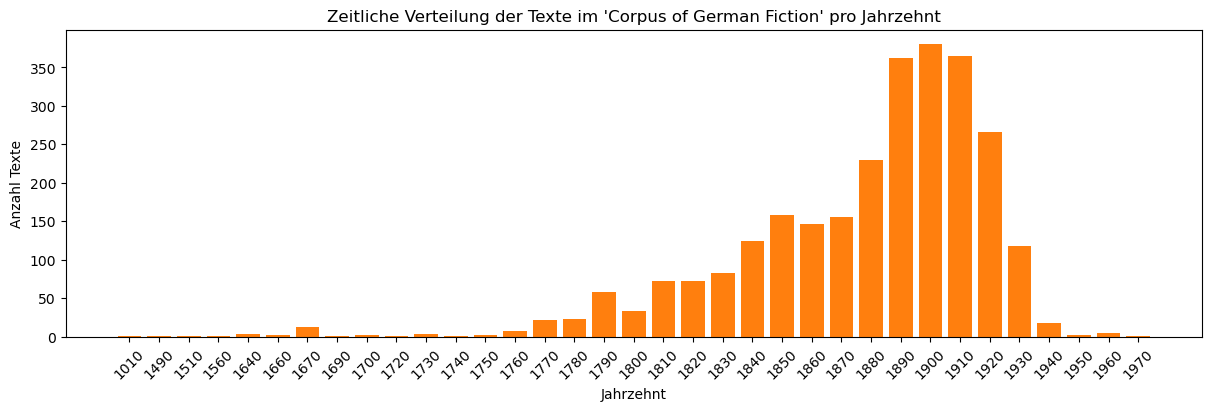

In [ ]:
# Visualisierung der Dekadenverteilung (Textanzahl pro Dekade)
fig_decade, ax_decade = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_decade.bar(decade_counts.index.astype(str), decade_counts.values, color="tab:orange")
ax_decade.set_title("Zeitliche Verteilung der Texte im 'Corpus of German-Language Fiction' pro Jahrzehnt")
ax_decade.set_xlabel("Jahrzehnt")
ax_decade.set_ylabel("Anzahl Texte")
plt.xticks(rotation=45)
plt.show()


## 4 Bewertung und Entscheidung

Die explorative Analyse erlaubt nun eine systematische Bewertung entlang der Kriterien von {cite:p}`schoech2017`.

| Kriterium           | ELTeC-German | d-Prose 1870–1920 | Corpus of German Fiction |
| ------------------- | ------------ | ----------------- | ------------------------ |
| Zeitliche Abdeckung | mittel       | gering            | hoch                     |
| Datenqualität       | hoch         | hoch              | mittel                   |
| Repräsentativität   | hoch         | mittel            | gering                   |
| Umfang              | klein        | mittel            | groß                     |
| Verfügbarkeit       | sehr gut     | gut               | gut                      |

```{admonition} Zwischenfazit
:class: keypoint
Das Corpus of German-Language Fiction bietet die größte zeitliche Breite und damit die besten Voraussetzungen, um Veränderungen im sprachlichen Diskurs über Luftqualität im 19. Jahrhundert zu untersuchen.
```

---



Man erkennt, dass das **Corpus of German-Language Fiction** einerseits das einzige Korpus ist, das den für unsere Forschung notwendigen Zeitraum abdeckt. Andererseits ist es – wie die Verteilung zeigt – eindeutig nicht balanciert. In den Metadaten oder in der Korpusbeschreibung gibt es zudem keinerlei Hinweise darauf, dass dieses Korpus als repräsentativ angelegt wurde.

Für die weiteren Analysen müssen wir das Korpus daher filtern. Dies erfolgt im [nächsten Abschnitt](corpus-collection_filtering-our-corpus.ipynb).